In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import plotly.express as px
import cufflinks as cf
import numpy as np
import statsmodels.api as sm
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

# Business understanding
Het ziekenhuis Isala wil de zorg voor diabetespatiënten verbeteren. Het gaat hier specifiek om het behandelproces door onnauwkeurigheden in metingen te filteren en hierop te baseren of een behandelplan aangepast moet worden of niet. Visualisaties zullen helpen bij het verkrijgen van inzicht van diverse meetmethoden om vervolgens conclusies te kunnen trekken. Die zijn er nog niet. deze onnauwkeurigheden voor aangegeven als CV. De CV is de variatiecoëfficiënt. Dit is een maat voor de relatieve variabiliteit. Het is de verhouding tussen de standaardafwijking en het gemiddelde (gemiddelde genomen van de spreiding van meetpunten). Hoe kleiner de variatiecoëfficiënt is, hoe minder de gegevens verspreid zijn vanuit het gemiddelde.

Variatiecoëfficiënt = (Standaardafwijking/ Gemiddelde) * 100.

 
# Data understanding
Welke databronnen zijn gegeven en in welk formaat: Een excel bestand genaamd: Complete-dataset-FINAL.xlsx

note
Het excel bestand dat gebruikt gaat worden, is het resultaat van rapporten die om zijn gezet naar excel. Dit is de meest recente versie waarin de meetmethoden zijn genormaliseerd en de waarden dubbelgecheckt zijn.

Hoe groot zijn deze databronnen: 355 kB

-4685 rijen

-12 kolommen

Kolomnamen: Method name, N (no. labs), Mean, Bias, CV, Sample, Reference value, Year, Source, Type, Manufacturer (fabrikant).

# Data preparation
De dataset wordt aangepast, zodat het bruikbaar is om de bapaalde visualisaties te ontwikkelen, onze product owner wilde distinctie tussen de 2 verschillende surveys (CAP & eura1c)

In [2]:
# De dataset die we gaan gebruiken
df = pd.read_excel('Complete-dataset-final.xlsx')
# Data gebruikt voor de gecombineerde CV grafiek van de eura1c en CAP samengevoegd
df_fout = df.groupby(['Method name','Year']).mean().reset_index().set_index('Method name')
# Alleen CAP data
df_cap_prep = df.loc[df['Source (CAP/EurA1c)'] == 'CAP']
# Gemiddelde waardes CV pakken per jaar
df_cap_all = df_cap_prep.groupby(['Year']).mean().reset_index()
# Overige kolommen droppen
df_cap_all  = df_cap_all.drop(columns = ['Bias','Reference Value','Total Error','Mean'])
# Gemiddelde waardes CV pakken
df_cap = df_cap_prep.groupby(['Method name','Year']).mean().reset_index().set_index('Method name')
df_cap = df_cap.drop(columns = ['Bias','Reference Value','Total Error','Mean'])
# Alleen eura1c data
df_eura1c_prep = df.loc[df['Source (CAP/EurA1c)'] == 'EURA1c']
df_eura1c_all  = df_eura1c_prep.groupby(['Year']).mean().reset_index()
df_eura1c_all = df_eura1c_all.drop(columns = ['Bias','Reference Value','Total Error','Mean'])
df_eura1c = df_eura1c_prep.groupby(['Method name','Year']).mean().reset_index().set_index('Method name')
df_eura1c = df_eura1c.drop(columns = ['Bias','Reference Value','Total Error','Mean'])

In [3]:
df_best = df.dropna().groupby('Manufacturer')
test = df_best.size().sort_values(ascending=False)
test = test[test > 100]
df_manufacturer_cap = df[df['Manufacturer'].isin(test.index)]
df_manufacturer_cap = df_manufacturer_cap[df_manufacturer_cap['Source (CAP/EurA1c)'] == 'CAP']
df_manufacturer_cap = df_manufacturer_cap.drop(columns=['Mean','Bias','Total Error','Reference Value','Year'])
df_manufacturer_cap = df_manufacturer_cap.groupby('Manufacturer').mean()
df_manufacturer_cap = df_manufacturer_cap.sort_values(by = 'CV').reset_index()

df_manufacturer_eura1c = df[df['Manufacturer'].isin(test.index)]
df_manufacturer_eura1c = df_manufacturer_eura1c[df_manufacturer_eura1c['Source (CAP/EurA1c)'] == 'EURA1c']
df_manufacturer_eura1c = df_manufacturer_eura1c.drop(columns=['Mean','Bias','Total Error','Reference Value','Year'])
df_manufacturer_eura1c = df_manufacturer_eura1c.groupby('Manufacturer').mean()
df_manufacturer_eura1c = df_manufacturer_eura1c.sort_values(by = 'CV').reset_index()

# Modeling
CAP en eura1c gemiddelde CV per jaar per methode

In [4]:
def plotCV_fout(method):
    df_fout.loc[[method]].iplot(
                    xTitle='Year',
                    x = 'Year',
                    y = 'CV',
                    mode='lines+markers',
                    yTitle='CV {}'.format(method),
                    xaxis_range=[2006,2021],
                    title = 'Average CV per Year FOUT'
        
                     )

In [5]:
def plotCV_CAP(method):
    df_cap.loc[[method]].iplot(
                    xTitle='Year',
                    x = 'Year',
                    y = 'CV',
                    mode='lines+markers',
                    yTitle='CV {}'.format(method),
                    xaxis_range=[2006,2021],
                    title = 'Average CV per Year'
        
                     )

In [6]:
def plotCV_eura1c(method):
    df_eura1c.loc[[method]].iplot(
                    xTitle='Year',
                    x = 'Year',
                    y = 'CV',
                    mode='lines+markers',
                    yTitle='CV {}'.format(method),
                    xaxis_range=[2016,2020],
                    title = 'Average CV per Year'
        
                     )

In [7]:
interact(plotCV_fout, method=df_fout.index.unique())

interactive(children=(Dropdown(description='method', options=('A1cNOW', 'Abbott Alinity', 'Abbott Alinity ci s…

<function __main__.plotCV_fout(method)>

In [8]:
interact(plotCV_CAP, method=df_cap.index.unique())

interactive(children=(Dropdown(description='method', options=('A1cNOW', 'Abbott Alinity ci series', 'Abbott Ar…

<function __main__.plotCV_CAP(method)>

In [9]:
interact(plotCV_eura1c, method=df_eura1c.index.unique())

interactive(children=(Dropdown(description='method', options=('Abbott Alinity', 'Abbott Architect', 'Abbott Ar…

<function __main__.plotCV_eura1c(method)>

Text(0.5, 1.0, 'gemiddelde CV waardes cap')

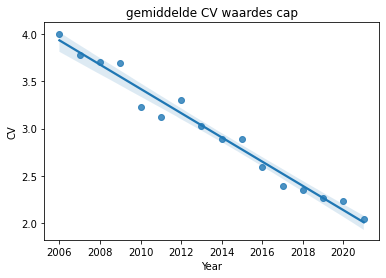

In [10]:
sns.regplot(data=df_cap_all, x = 'Year', y = 'CV').set_title('gemiddelde CV waardes cap')

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     CV   R-squared (uncentered):                   0.888
Model:                            OLS   Adj. R-squared (uncentered):              0.887
Method:                 Least Squares   F-statistic:                              3321.
Date:                Wed, 01 Jun 2022   Prob (F-statistic):                   1.52e-201
Time:                        09:48:37   Log-Likelihood:                         -605.00
No. Observations:                 421   AIC:                                      1212.
Df Residuals:                     420   BIC:                                      1216.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Year           0.0014   2.47e-05     57.624      0.000       0.001       0.001
==============================================================================
Omnibus:                       74.414   Durbin-Watson:                   0.705
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.410
Skew:                           1.049   Prob(JB):                     9.65e-28
Kurtosis:                       4.639   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

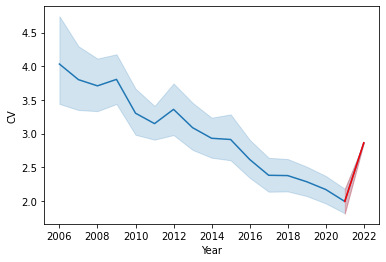

In [11]:
schaar = df_cap[df_cap["Year"] >= 2008]
X = schaar['Year']
y = schaar["CV"]

# Fit and make the predictions by the model
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
preddf = pd.DataFrame(predictions, columns=['CV'])
preddf['Year'] = "2022"
# preddf = preddf.groupby('Year').mean().reset_index()
test = pd.concat([df_cap,preddf])
test['Year'] = test['Year'].astype(str).astype(int)
test = test.reset_index(drop=True)
sns.lineplot(x = 'Year', y = 'CV', data = test)
sns.lineplot(x = 'Year', y = 'CV', data = test[(test['Year'] >= 2021) & (test['Year'] <= 2022)], color= 'red')
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     CV   R-squared (uncentered):                   0.926
Model:                            OLS   Adj. R-squared (uncentered):              0.926
Method:                 Least Squares   F-statistic:                              1505.
Date:                Wed, 01 Jun 2022   Prob (F-statistic):                    9.47e-70
Time:                        09:48:38   Log-Likelihood:                         -114.65
No. Observations:                 121   AIC:                                      231.3
Df Residuals:                     120   BIC:                                      234.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Year           0.0011   2.82e-05     38.795      0.000       0.001       0.001
==============================================================================
Omnibus:                        3.868   Durbin-Watson:                   0.646
Prob(Omnibus):                  0.145   Jarque-Bera (JB):                3.902
Skew:                           0.424   Prob(JB):                        0.142
Kurtosis:                       2.767   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

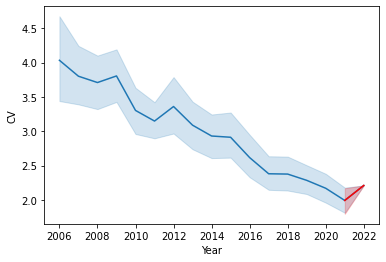

In [12]:
schaar = df_cap[df_cap["Year"] >= 2018]
X = schaar['Year']
y = schaar["CV"]

# Fit and make the predictions by the model
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
preddf = pd.DataFrame(predictions, columns=['CV'])
preddf['Year'] = "2022"
# preddf = preddf.groupby('Year').mean().reset_index()
test = pd.concat([df_cap,preddf])
test['Year'] = test['Year'].astype(str).astype(int)
test = test.reset_index(drop=True)
sns.lineplot(x = 'Year', y = 'CV', data = test)
sns.lineplot(x = 'Year', y = 'CV', data = test[(test['Year'] >= 2021) & (test['Year'] <= 2022)], color= 'red')
model.summary()

Text(0.5, 1.0, 'gemiddelde CV waardes cap')

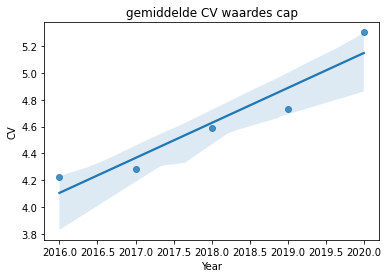

In [13]:
sns.regplot(data=df_eura1c_all, x = 'Year', y = 'CV').set_title('gemiddelde CV waardes cap')

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     CV   R-squared (uncentered):                   0.866
Model:                            OLS   Adj. R-squared (uncentered):              0.865
Method:                 Least Squares   F-statistic:                              711.3
Date:                Wed, 01 Jun 2022   Prob (F-statistic):                    7.77e-50
Time:                        09:48:39   Log-Likelihood:                         -234.08
No. Observations:                 111   AIC:                                      470.2
Df Residuals:                     110   BIC:                                      472.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Year           0.0025   9.41e-05     26.670      0.000       0.002       0.003
==============================================================================
Omnibus:                       34.586   Durbin-Watson:                   1.216
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.321
Skew:                           1.383   Prob(JB):                     1.31e-13
Kurtosis:                       5.274   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

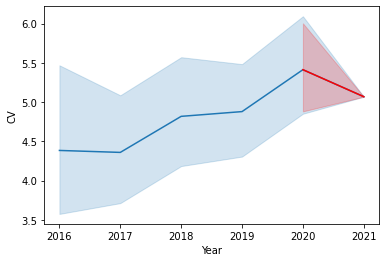

In [14]:
schaar = df_eura1c[df_eura1c["Year"] >= 2018]
X = schaar['Year']
y = schaar["CV"]

# Fit and make the predictions by the model
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
preddf = pd.DataFrame(predictions, columns=['CV'])
preddf['Year'] = "2021"
# preddf = preddf.groupby('Year').mean().reset_index()
test = pd.concat([df_eura1c,preddf])
test['Year'] = test['Year'].astype(str).astype(int)
test = test.reset_index(drop=True)
sns.lineplot(x = 'Year', y = 'CV', data = test)
sns.lineplot(x = 'Year', y = 'CV', data = test[(test['Year'] >= 2020) & (test['Year'] <= 2021)], color= 'red')
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     CV   R-squared (uncentered):                   0.850
Model:                            OLS   Adj. R-squared (uncentered):              0.849
Method:                 Least Squares   F-statistic:                              896.8
Date:                Wed, 01 Jun 2022   Prob (F-statistic):                    5.01e-67
Time:                        09:48:40   Log-Likelihood:                         -338.92
No. Observations:                 159   AIC:                                      679.8
Df Residuals:                     158   BIC:                                      682.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Year           0.0024   8.04e-05     29.947      0.000       0.002       0.003
==============================================================================
Omnibus:                       67.241   Durbin-Watson:                   1.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.616
Skew:                           1.717   Prob(JB):                     2.73e-44
Kurtosis:                       7.300   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

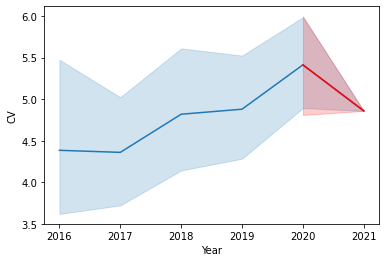

In [15]:
schaar = df_eura1c[df_eura1c["Year"] >= 2016]
X = schaar['Year']
y = schaar["CV"]

# Fit and make the predictions by the model
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
preddf = pd.DataFrame(predictions, columns=['CV'])
preddf['Year'] = "2021"
# preddf = preddf.groupby('Year').mean().reset_index()
test = pd.concat([df_eura1c,preddf])
test['Year'] = test['Year'].astype(str).astype(int)
test = test.reset_index(drop=True)
sns.lineplot(x = 'Year', y = 'CV', data = test)
sns.lineplot(x = 'Year', y = 'CV', data = test[(test['Year'] >= 2020) & (test['Year'] <= 2021)], color= 'red')
model.summary()

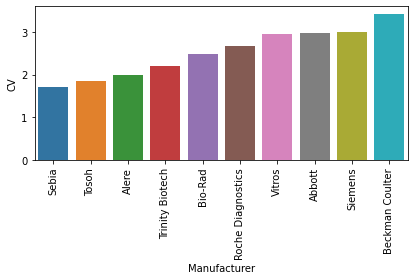

In [16]:
sns.barplot(data = df_manufacturer_cap, x = 'Manufacturer', y = 'CV')
plt.xticks(rotation=90)
plt.tight_layout()

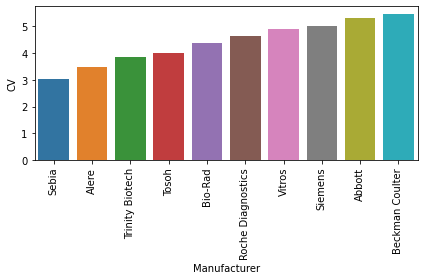

In [17]:
sns.barplot(data = df_manufacturer_eura1c, x = 'Manufacturer', y = 'CV')
plt.xticks(rotation=90)
plt.tight_layout()

# Evaluation
Onze product owner vond het belangrijk om inzicht te krijgen in hoe de methodes het over de jaren heen het deden met de cv waardes, onze data bestond uit twee verschillende surveys, de Amerikaanse(CAP) en de europeaanse(eura1c), om de cv waardes te visualiseren hadden we dan ook de cv waardes per methode per jaar het gemiddelde gepakt en dat gevisualiseerd. Na een stakeholder meeting waar we dit product opleverde kwamen we erachter dat de cv waardes van de CAP en eura1c beide anders worden berekend en opgesteld. Hierdoor waren we genoodzaakt om 2 grafieken te ontwikkelen, één van de CAP data en één van de eura1c data. Gelukkig hadden we onze dataset zo opgesteld dat in onze complete dataset een variabel was waar we hadden aangegeven of de data van de CAP of de eura1c survey was.

Mijn eerste bevinding bij allebei de grafieken die ik kan maken is dat er veel data punten missen. Hierdoor is het lastig om nou een heel erg duidelijk beeld te krijgen hoe de methodes het nou over de jaren heen doen (sommige methodes hebben maar 1 jaar aan data en andere wel over meerdere jaren). Bijvoorbeeld bij de CAP data is de Tosoh G7 Auto HPLC goed gedocumenteerd over de jaren heen en kan je zien of de methode zich verbeterd of alleen maar slechter word. Hier kan je zien dat de CV waarde in 2017 opeens een stuk lager en dus beter werd maar in 2018 de waarde snel weer naar boven schoot weer bijna terug naar ongeveer dezelfde waardes als jaren ervoor. Dit soort schommelingen komen vaker voor in de dataset, daarom is het ook interessant om hier verder naar te kijken

Mijn tweede bevinding is dat er bij de cap en eura1c data verschillende manufacturers het beste zijn bij hun data, maar toch ook weer veel hetzelfde. De nummers 1-5 en 6-10 zijn namelijk allemaal dezelfde manufacturers maar net op een andere positie. Dit laat toch zien dat er wel duidelijk verschil zit tussen de manufacturers.

Daarom hebben we een nieuwe grafiek gerealiseerd om de gemiddelde CV waardes van alle methoden over alle jaren heen te laten zien en zie je dat over de jaren heen er een trend naar beneden is bij de cap data en bij de eura1c er juist een trend naar boven is bij de laatste paar jare. De grote schommelingen per jaar komen wel echt alleen per methode voor en niet in het algemeen over de hele dataset, ik zit geen punten in de grafiek die heel erg afwijken van de regressielijn.

# Conclusie

Onze product owner heeft nu een duidelijk beeld van hoe de methodes het over de jaren heen ontwikkelen, ook zijn we erachter gekomen dat bij de CAP data alle methodes over de afgelopen jaren steeds beter presteren, bij de eura1c juist minder goed. Het kan daarom interessant zijn om onderzoek te doen naar waarom dit het geval is.

Ook is er voor onze product owner nu een duidelijker beeld wat betreft de onnauwkeurigheden binnen de verschillende manufacturers. Het is daarom ook interresant om onderzoek te doen naar de slechter presterende manufacturers waarom dit zo is, dit gaat helaas buiten onze scope om.